### Stock Sentiment Analysis using News Headlines

About the problem and the dataset used.

The data set in consideration is a combination of the world news and stock price shifts.
Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
There are 25 columns of top news headlines for each day in the data frame.
Class 1- the stock price increased.
Class 0- the stock price stayed the same or decreased.
About the approach.

Used TF-IDF and Bag of Words for extracting featues from the headlines.
Used Random Forest Classifier, Multinational Naive Bayes and Passive Aggressive Classifier for analysis.


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('Stock_News_Dataset.csv', encoding = "ISO-8859-1")

In [3]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [4]:
#Removing punctuations 
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ",regex=True, inplace=True)

In [5]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [6]:
for col in data.columns:
    data[col]=data[col].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [7]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

### Using Tf-idf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [9]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
train_df=tfvector.fit_transform(headlines)

### MultinomialNB

In [10]:
# implement MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Confusion Metrics

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

Confusion matrix, without normalization


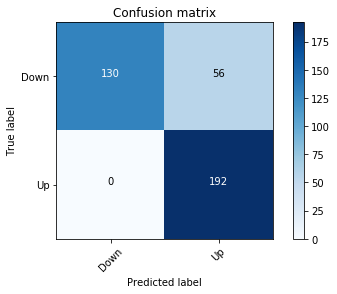

In [14]:
# Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

### MultinomialNB using Bag of words¶

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

Confusion matrix, without normalization


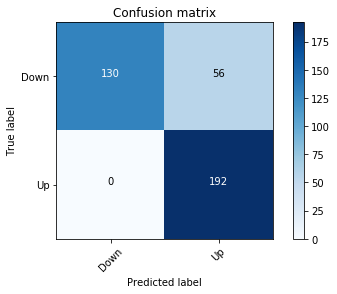

In [15]:
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])